# A3 - Python

This assignment will cover topics of classification, dimensionality reduction, and text mining.

Make sure that you keep this notebook named as "a3.ipynb" 

Any other packages or tools, outside those listed in the assignments or Canvas, should be cleared
by Dr. Brown before use in your submission.

# Q0 - Setup

The following code looks to see whether your notebook is run on Gradescope (GS), Colab (COLAB), or the linux Python environment you were asked to setup.

In [63]:
import re 
import os
import platform 
import sys 

# flag if notebook is running on Gradescope 
if re.search(r'amzn', platform.uname().release): 
    GS = True
else: 
    GS = False

# flag if notebook is running on Colaboratory 
try:
  import google.colab
  COLAB = True
except:
  COLAB = False

# flag if running on Linux lab machines. 
cname = platform.uname().node
if re.search(r'(guardian|colossus|c28|lebrown)', cname):
    LLM = True 
else: 
    LLM = False

print("System: GS - %s, COLAB - %s, LLM - %s" % (GS, COLAB, LLM))

System: GS - False, COLAB - False, LLM - False


## Notebook Setup

It is good practice to list all imports needed at the top of the notebook. You can import modules in later cells as needed, but listing them at the top clearly shows all which are needed to be available / installed.

If you are doing development on Colab, the otter-grader package is not available, so you will need to install it with pip (uncomment the cell directly below).

In [64]:
# Only uncomment if you developing on Colab 
#if COLAB == True: 
#    print("Installing otter:")
#    !pip install otter-grader==4.2.0 

In [65]:
# Import standard DS packages 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import statistics
import textwrap
%matplotlib inline


from sklearn.model_selection import train_test_split, StratifiedKFold 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree        # decision tree classifier
from sklearn import neighbors   # knn classifier
from sklearn import naive_bayes # naive bayes classifier 
from sklearn import svm         # svm classifier
from sklearn import ensemble    # ensemble classifiers
from sklearn import metrics     # performance evaluation metrics
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Package for Autograder 
import otter 
grader = otter.Notebook()

In [66]:
grader.check("q0")

q0 results:
    q0 - 1 result:
        ✅ Test case passed

    q0 - 2 result:
        ❌ Test case failed
        Trying:
            LLM == True | GS == True
        Expecting:
            True
        **********************************************************************
        Line 1, in q0 1
        Failed example:
            LLM == True | GS == True
        Expected:
            True
        Got:
            False

# Q1 - Pokemon Data 

Consider the following data set of Pokemon (collected from several sources, pokemon.com, pokemondb, bulbapedia). 



## Q1(a) - Load the data 

Load the Pokemon data into a Data Frame, `pok`, consider how to read in missing data.

In [67]:
# Read in Pokemon data
pok = pd.read_csv('data/Pokemon.csv', na_values=['NA', 'N/A', ''])

pok.head()

,Num,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [68]:
grader.check("q1a")

q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q1(b) - Explore the Data 

Look at the distribution of Pokemon skills we will use in this analysis: `HP`, `Attack`, `Defense`, `SpAtk` - Special Attack, `SpDef` - Special Defense, and `Speed`. 

Create a violinplot showing the distribution of these variables. 


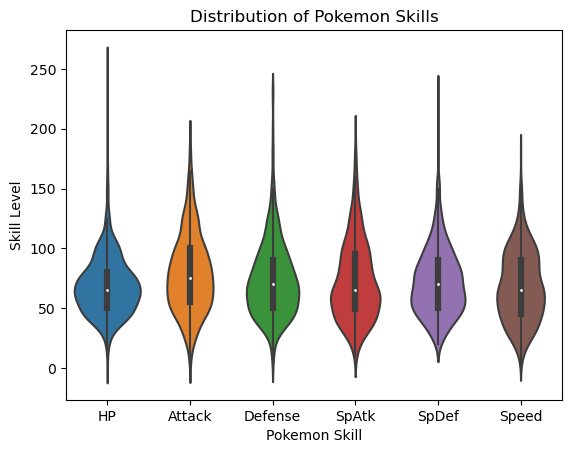

In [69]:
# Pokemon skills to plot
skills = ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']
# Create violinplot
sns.violinplot(data=pok[skills])
# Set the plot title and axis labels
plt.title('Distribution of Pokemon Skills')
plt.ylabel('Skill Level')
plt.xlabel('Pokemon Skill')
# Show the plot
plt.show();

<!-- END QUESTION -->

## Q1(c) - Prepare the data 

The six features (Pokemon Skills) have different ranges, therefore we should scale the data before considering PCA. Standardize the data over the six features of interest, store this in `pokScaled`.

In [70]:
# Pokemon skills to standardize
skills = ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']

# Scale the data 
pokScaled = StandardScaler().fit_transform(pok[skills])

In [71]:
grader.check("q1c")

q1c results: All test cases passed!

## Q1(d) - Principal Components Analysis 

Perform principal components analysis (PCA) on the scaled Pokemon skills data. 
Store the results of PCA in `pokPCA` and the transformed data in `pokTr`.

In [72]:
# Run PCA on the scaled data 
pca = PCA()
pokPCA = pca.fit(pokScaled)

# Store the transformed data in pokTr
pokTr = pca.transform(pokScaled)

In [73]:
grader.check("q1d")

q1d results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q1(e) - Explore the Results 

Plot the transformed data in the space defined by the first two principal components. This should be a scatterplot.

In [74]:
# Turn into a DF
pokTr = pd.DataFrame(pokTr, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

pokTr.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.556375,-0.021482,0.666504,0.184176,-0.403807,-0.303004
1,-0.362867,-0.050269,0.667913,0.269254,-0.225788,-0.194487
2,1.280152,-0.062720,0.623914,0.331391,-0.001545,-0.068177
3,2.620916,0.704263,0.995538,-0.199321,-0.310170,0.087380
4,-1.758284,-0.706179,0.411454,-0.268602,-0.168877,-0.069368


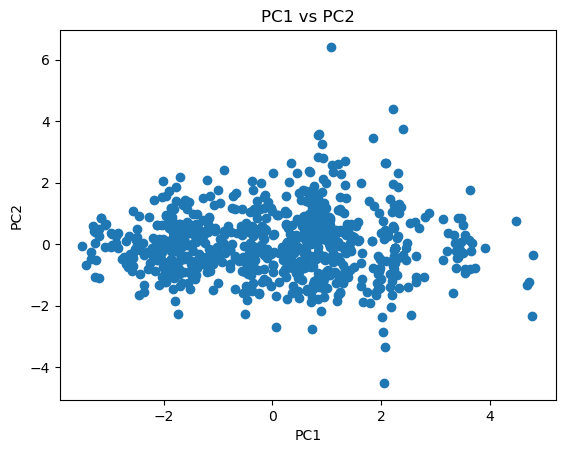

In [75]:
# Plot the transformed data  
plt.scatter(pokTr['PC1'], pokTr['PC2'])
plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(f) - Explore the Results, part 2 

Explore the amount of variance explained by each principal component direction. First, plot the proportion of variance explained (y-axis) vs. the different principal components.

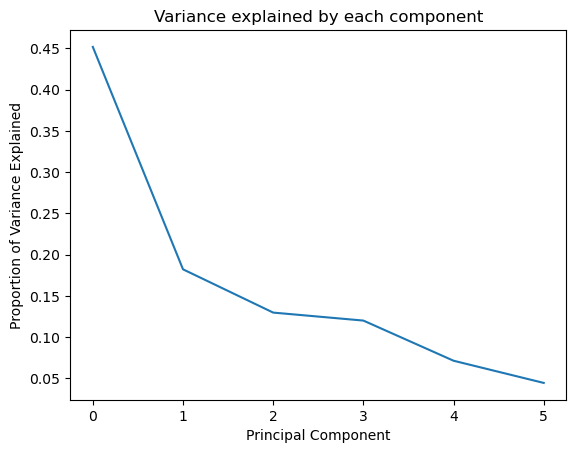

In [76]:
# Plot variance explained by each component   
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(g) - Explore the Results, part 3

Plot the cumulative proportion of variance explained by the principal components.


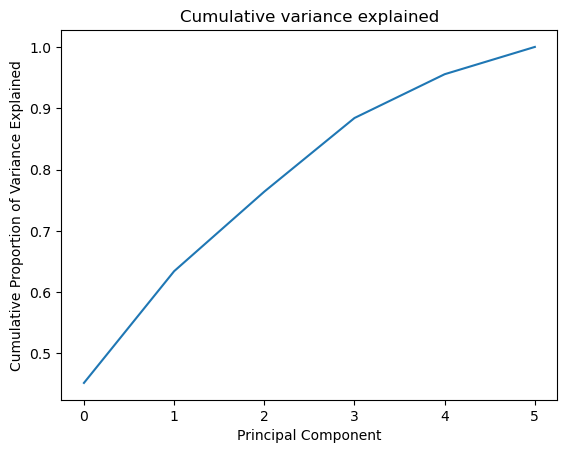

In [77]:
# Plot the cumulative variance explained 
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative variance explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

<!-- END QUESTION -->

# Q2 - College Data 

In this problem, we will explore data on colleges.  The set of colleges considered have high earning potential for undergraduates with computer science degrees  (data comes from the National Center for Education Statistics, NCES and Payscale.com).  


## Q2(a) - PCA on College Data 


Read in the `college_data` file into a DataFrame `college`.  Make sure to process it in an appropriate manner `college_sc` (ignore the first three columns in the analysis). Then, perform PCA on the prepared data `college_pca` and transform the data `college_tr`. 

In [78]:
# Load, preprocess and run PCA on the college data    

college = pd.read_csv('data/college_data.csv', na_values=['NA', 'N/A', ''])

college_sc = StandardScaler().fit_transform(college.iloc[:,3:])

pca = PCA()
college_pca = pca.fit(college_sc)

college_tr = pca.transform(college_sc)

In [79]:
grader.check("q2a")

q2a results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q2(b) - Explore the Results 

Plot the data in the space defined by the first two principal components (labeling each point with the school it represents - use the `ShortHandName` column).

In [80]:
# Turn into a DF
college_tr = pd.DataFrame(college_tr, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                               'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

college_tr.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-0.823056,-0.689564,-0.494525,-0.557486,1.885040,0.992604,-0.368774,1.001835,0.117968,0.095512,-0.109656,-0.105228,-0.106119,-0.053931,-0.029127,-0.058342,0.033848,-0.001565
1,-4.306220,-0.285363,-0.302499,-0.629897,-0.175696,0.300109,0.651592,-0.030590,0.113379,0.750902,-0.048463,0.227797,-0.126912,0.093760,-0.089645,0.010271,-0.019936,-0.013308
2,-4.872178,-0.198929,-1.628556,0.346716,-0.919910,-1.086315,-0.224867,0.322017,-0.179264,-0.053733,0.556616,-0.045888,-0.184965,0.018247,0.090884,-0.053305,0.039003,0.004469
3,2.384135,-2.461195,0.310577,1.062420,0.863052,-0.843605,-0.097707,0.469127,0.216121,-0.310599,-0.022806,0.220750,0.004697,0.217311,-0.024286,0.034719,-0.039706,0.012434
4,4.891553,0.399386,0.118751,1.502727,-0.690353,-0.007117,-0.104884,0.575188,-0.595767,0.631389,-0.242412,-0.005240,0.298693,-0.044181,0.077752,-0.030921,0.001625,0.002990


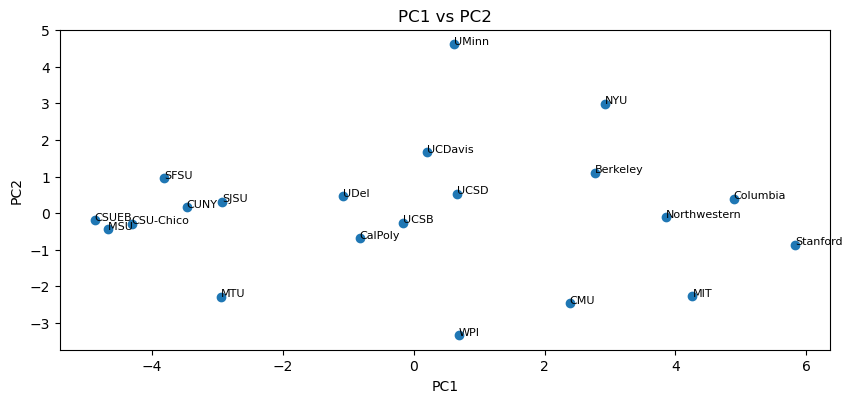

In [81]:
# Plot college data in the first two principal components
# Set plot size
plt.figure(figsize=(7, 4))

plt.scatter(college_tr['PC1'], college_tr['PC2'])

# Add labels to each point with the ShortHandName column
for i, name in enumerate(college['ShortHandName']):
    plt.text(college_tr.loc[i, 'PC1'], college_tr.loc[i, 'PC2'], name, fontsize=8)

plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Set clearance
plt.subplots_adjust(left=0.1, right=1.2, bottom=0.1, top=0.9)

plt.show()

<!-- END QUESTION -->

## Q2(c) - Explore the Results, part 2 

Plot the amount of cumulative variance explained. How many principal components should be used for any further analysis to be done on the data if you want 90% of the variance explained?

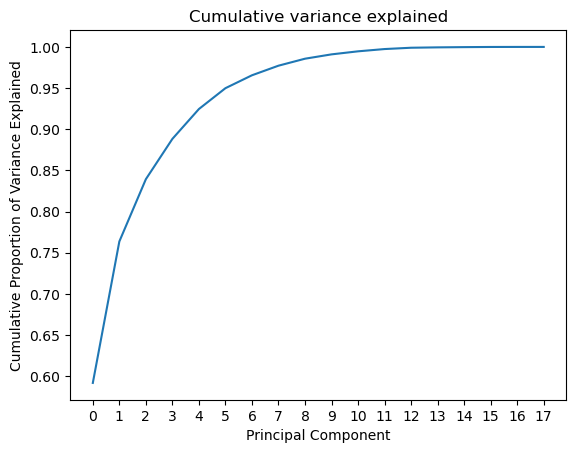

Number of principal components needed to explain 90% of the variance: 5


In [82]:
# Plot cumulative variance explained.    
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative variance explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xticks(range(len(pca.explained_variance_ratio_)))
plt.show()

cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_var_ratio >= 0.9) + 1
print(f"Number of principal components needed to explain 90% of the variance: {n_components}")

numPC = 5

# Q3 - Text Classification 


You will look to predict whether authors of 19th and early 20th centuries novels are men or women. The data set consists of 45 books available from Project Gutenberg.  

The text files are split into negative - Men and positive - Female authors.  Additional information about the authors, books, and other metadata is available in the `books_data.csv` file. 



## Q3(a) - Load the Data 
Load the books into a list `textdata` and a np.ndarray `yvalues`.  I highly suggest using `scikit-learn`'s `load_files` function. 

Load the additional data file into a Data Frame called `books_data`. 

In [83]:
# Load the book data

# Set the path to the directory containing the books
books_dir = r'data/books/'

# Load the books
books = load_files(books_dir)

# Store the text data and target labels
textdata = books.data
textdata = [doc for doc in textdata]

yvalues = books.target

# Load the additional data
books_data = pd.read_csv('data/books_data.csv', na_values=['NA', 'N/A', ''])

print("Samples per class: {}".format(np.bincount(yvalues)))
books_data.head()

Samples per class: [30 15]


,Author Name,Gender,Active Decade,Genres,Fiction-Nonfiction,Gid,Char-F,Char-M,Char-Occur-F,Char-Occur-M,Pronouns-F,Pronouns-M
0,"Dickens, Charles",M,1850,Novel,Fiction,98,9,33,347,833,1280,4264
1,"Dickens, Charles",M,1850,Novel,Fiction,1023,26,95,567,2566,4002,9652
2,"Dickens, Charles",M,1850,Novel,Fiction,766,33,102,694,2566,5631,7210
3,"Dickens, Charles",M,1850,Novel,Fiction,1400,14,39,376,657,1784,4573
4,"Dickens, Charles",M,1850,Novel,Fiction,963,28,71,218,1076,5149,10251


In [84]:
grader.check("q3a")

q3a results: All test cases passed!

## Q3(b) - Prepare the Data 

Split the data into `text_trainval`, `text_test` and `y_trainval`, `y_test` variables.  Use 20% of the data in the test set with a `random_state` of 42 and make sure to stratify the split (the data is imbalanced). 

In [85]:
# Split the data 
text_trainval, text_test, y_trainval, y_test = train_test_split(textdata, yvalues, 
                                                                test_size=0.2, 
                                                                random_state=42, 
                                                                stratify=yvalues)

In [86]:
grader.check("q3b")

q3b results: All test cases passed!

## Q3(c)  - Explore the Data

Replace underscore symbols in both the trainval text data and test text data.  

Create a document-term count matrix for the "trainval" data using the default tokenizer, removing the standard English stopwords and store this in `dtm_trainval`.

Store the names of the terms in the dtm matrix in the variable `vocab`.

In [87]:
# Create document-term count matrix for the "trainval" text data 
text_trainval = [doc.decode('utf-8').replace("_", " ") for doc in text_trainval]
text_test = [doc.decode('utf-8').replace("_", " ") for doc in text_test]

vectorizer = CountVectorizer(stop_words='english')
dtm_trainval = vectorizer.fit_transform(text_trainval)
dtm_test = vectorizer.transform(text_test)

vocab = vectorizer.get_feature_names_out()

In [88]:
grader.check("q3c")

q3c results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q3(d) - Explore the Data 

Create a plot showing the top 15 most frequently used words in the trainval text data. 

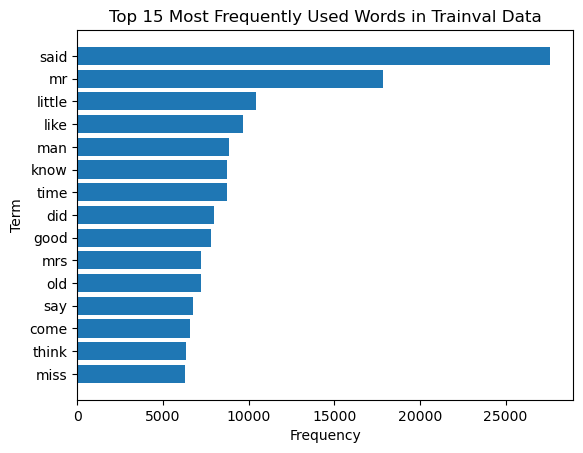

In [89]:
# Get the total frequency of each term
term_freq = dtm_trainval.sum(axis=0)

# Convert the term frequencies to df
term_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'freq': term_freq.tolist()[0]})
term_freq_df = term_freq_df.sort_values('freq', ascending=False)

freq_words = term_freq_df[:15]
freq_words = freq_words.sort_values('freq', ascending=True)

# Plot the top 15 terms using a horizontal bar chart
plt.barh(freq_words['term'], freq_words['freq'])
plt.xlabel('Frequency')
plt.ylabel('Term')
plt.title('Top 15 Most Frequently Used Words in Trainval Data')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q3(e) - Explore the Data 

For the trainval text data, plot the top 15 most frequently used words in the Female-authored books and the Male-authored books.  Put these two bar plots side-by-side to compare the results. 

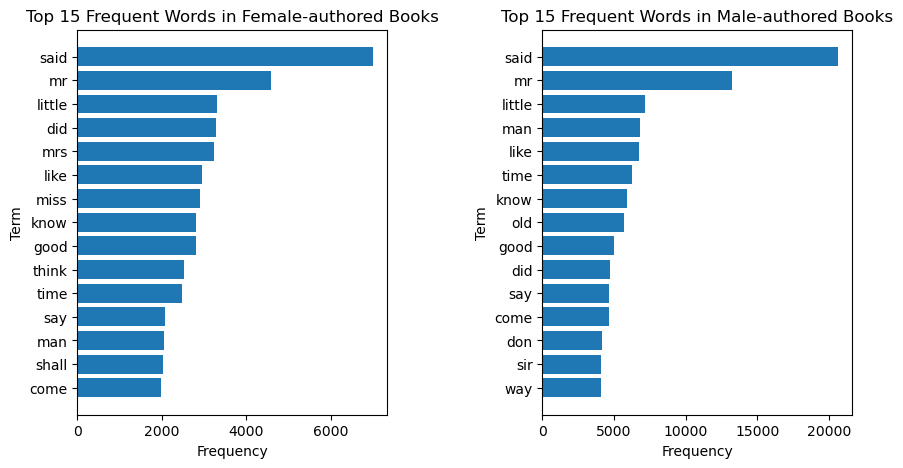

In [90]:
# Create a plot of the top 15 most frequently used words in the 
# Female-authored and Male-authored books.
female_indices = np.where(y_trainval == 1)[0]
male_indices = np.where(y_trainval == 0)[0]
dtm_trainval_female = dtm_trainval[female_indices, :]
dtm_trainval_male = dtm_trainval[male_indices, :]

# Get the total frequency of each term in the female-authored books
term_freq_female = dtm_trainval_female.sum(axis=0)

# Convert the term frequencies to df
term_freq_female_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'freq': term_freq_female.tolist()[0]})
term_freq_female_df = term_freq_female_df.sort_values('freq', ascending=False)

# Get the top 15 terms in the female-authored books
freq_words_female = term_freq_female_df[:15]
freq_words_female = freq_words_female.sort_values('freq', ascending=True)

# Plot the top 15 terms in the female-authored books using a horizontal bar chart
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(freq_words_female['term'], freq_words_female['freq'])
plt.xlabel('Frequency')
plt.ylabel('Term')
plt.title('Top 15 Frequent Words in Female-authored Books')

# Get the total frequency of each term in the male-authored books
term_freq_male = dtm_trainval_male.sum(axis=0)

# Convert the term frequencies to df
term_freq_male_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'freq': term_freq_male.tolist()[0]})
term_freq_male_df = term_freq_male_df.sort_values('freq', ascending=False)

# Get the top 15 terms in the male-authored books
freq_words_male = term_freq_male_df[:15]
freq_words_male = freq_words_male.sort_values('freq', ascending=True)

# Plot the top 15 terms in the male-authored books using a horizontal bar chart
plt.subplot(1, 2, 2)
plt.barh(freq_words_male['term'], freq_words_male['freq'])
plt.xlabel('Frequency')
plt.ylabel('Term')
plt.title('Top 15 Frequent Words in Male-authored Books')

# Spacing between the subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show();

<!-- END QUESTION -->

## Q3(f) - Bernoulli Naive Bayes 

Let's know explore using Bernoulli Naive Bayes as a classifier to predict the gender of the author. 

We will use the split of the data into trainval / test found above to train the model and then evaluate it's performance. 

Create the training data, `X_trainval` to be binary with features using the default tokenizer, stop words removed, appear in at least 5 documents and is limited to the top 5000 features.  

Calculate the training accuracy `train_acc` and testing accuracy `test_acc` for the model.



In [91]:
# Run Bernoulli Naive Bayes model
binary_vectorizer = CountVectorizer(binary=True, stop_words='english', min_df=5, max_features=5000)
X_trainval = binary_vectorizer.fit_transform(text_trainval)
X_test = binary_vectorizer.transform(text_test)

# Fit the Bernoulli Naive Bayes classifier on the training data
clf = naive_bayes.BernoulliNB()
clf.fit(X_trainval, y_trainval)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the training accuracy and testing accuracy for the model
train_acc = clf.score(X_trainval, y_trainval)
test_acc = clf.score(X_test, y_test)

print(f"Training accuracy: {train_acc:.3f}")
print(f"Testing accuracy: {test_acc:.3f}")

Training accuracy: 0.861
Testing accuracy: 0.667


In [92]:
grader.check("q3f")

q3f results: All test cases passed!

## Q3(g) - Multinomial Naive Bayes 

Let's know explore using Multinomial Naive Bayes as a classifier to predict the gender of the author. 

We will use the split of the data into trainval / test found above to train the model and then evaluate it's performance. 

Create the training data, `X_trainval` with features using the default tokenizer, stop words removed, appear in at least 5 documents and is limited to the top 5000 features.  

Calculate the training accuracy `train_acc2` and testing accuracy `test_acc2` for the model.


In [93]:
# Run Multinomial Naive Bayes model
vectorizer = CountVectorizer(stop_words='english', min_df=5, max_features=5000)
X_trainval = vectorizer.fit_transform(text_trainval)
X_test = vectorizer.transform(text_test)

# Fit the Multinomial Naive Bayes classifier on the training data
clf2 = naive_bayes.MultinomialNB()
clf2.fit(X_trainval, y_trainval)

# Predict on the test data
y_pred = clf2.predict(X_test)

# Calculate the training accuracy and testing accuracy for the model
train_acc2 = clf2.score(X_trainval, y_trainval)
test_acc2 = clf2.score(X_test, y_test)

print(f"Training accuracy: {train_acc2:.3f}")
print(f"Testing accuracy: {test_acc2:.3f}")

Training accuracy: 1.000
Testing accuracy: 0.889


In [94]:
grader.check("q3g")

q3g results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q3(h) - Naive Bayes Models 

Looking at the results of the two models above. Answer the following questions.  


Which of the two models is preferred?  Why?   (10 words or less)

***Multinomial Naive Bayes has much higher test set accuracy, so it is preffered.***


What is a problem for both models?  How might you solve it? (12 words or less)

***Both models assume that all features in a document are independent of each other. Moreover, both models are overfitting. As a solution, a different model could be used. We can use regularization to address overfitting.***

<!-- END QUESTION -->

## Q3(i) - Other Models 

Let's now look to explore using other models. 

You will set up a pipeline, `pipe`, that will use a Random Forest model with 100 trees and a random_state = 4821.  

In the pipeline (`param_grid`), you will consider using both a document term count matrix as well as a TF-IDF matrix. 
In either case, limit the matrix to words that appear in at least 4 documents and remove English stop words.  Consider features of unigrams, unigrams + bigrams, and bigrams.  Examine a maximum feature limit of either 5000 or 10000.  

Optimize your choice of hyperparameters using GridSearchCV, `grid`, with stratified 4-fold cross-validation (random_state = 4821), select the parameters using AUC. 

Note, do not run the jobs in parallel, you may exceed the memory resources of the autograder on Gradescope. 

In [101]:
# Run Pipeline to find best model
# Set up the pipeline
pipe = Pipeline([
    ('vec', CountVectorizer()),
    ('rf', ensemble.RandomForestClassifier(random_state=4821))
])

# Set up the parameter grid
param_grid = [    
    {'vec': [CountVectorizer(stop_words='english', min_df=4)],
    'vec__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'rf__n_estimators': [100],
    'vec__max_features': [2500, 5000]},
    {'vec': [TfidfVectorizer(stop_words='english', min_df=4)],
    'vec__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'rf__n_estimators': [100],
    'vec__max_features': [2500, 5000]}]

# Perform the grid search
grid = GridSearchCV(pipe,param_grid,cv=StratifiedKFold(n_splits=4,random_state = 4821,shuffle=True),
                    scoring='roc_auc',n_jobs=1,verbose=1)
grid.fit(text_trainval, y_trainval)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best cross-validation score: 0.91
Best parameters:
{'rf__n_estimators': 100, 'vec': TfidfVectorizer(max_features=5000, min_df=4, ngram_range=(1, 2),
                stop_words='english'), 'vec__max_features': 5000, 'vec__ngram_range': (1, 2)}


In [102]:
grader.check("q3i")

q3i results: All test cases passed!

## Q3(j) - Explore the Results 

Calculate the AUC on the test text, `auc_test`.   

Gather the importances of the features in the best model in `importance`.

Create a bar plot with the top 20 features sorted by importance.  


AUC on test set: 1.00


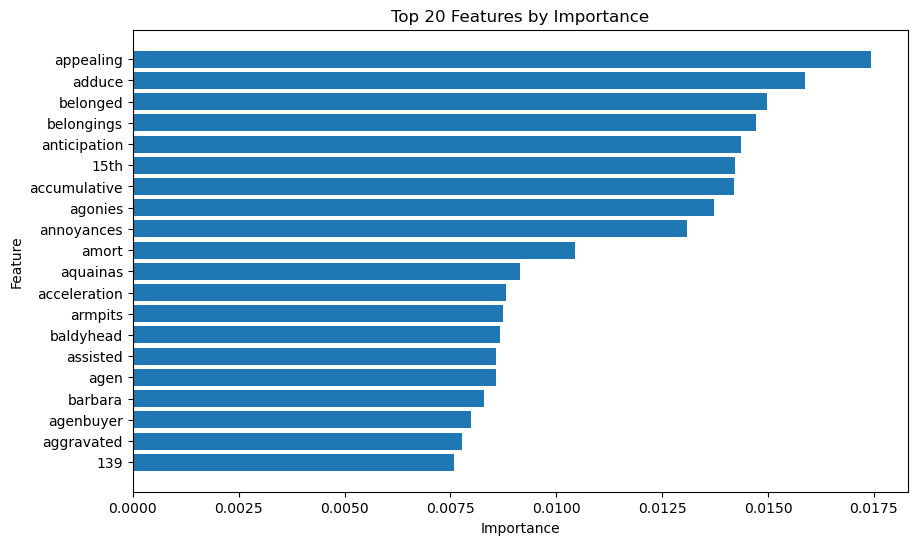

In [103]:
y_pred = grid.best_estimator_.predict(text_test)
auc_test = metrics.roc_auc_score(y_test, y_pred)
print(f"AUC on test set: {auc_test:.2f}")

importance = grid.best_estimator_.named_steps['rf'].feature_importances_

# Get indices of top 20 features sorted by importance
indices = importance.argsort()[::-1][:20]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.title("Top 20 Features by Importance")
plt.barh(range(len(indices)), importance[indices][::-1])
plt.yticks(range(len(indices)), [vocab[i] for i in indices][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show();

In [104]:
grader.check("q3j")

q3j results: All test cases passed!